In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df=pd.read_csv("medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df["BMI"]=df.weight/(df.height/100)**2
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [5]:

def calculate_overwight(bmi):
    if bmi<25:
        return 0
    else:
        return 1
    
df["overweight"]=df["BMI"].apply(calculate_overwight)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [12]:
def normalize_col(column):
    if column==1:
        return 0
    else:
        return 1
    
df["cholesterol"]=df["cholesterol"].apply(normalize_col)
df["gluc"]=df["gluc"].apply(normalize_col)

In [53]:
df_cat=pd.melt(df, id_vars="cardio",value_vars=['active','alco','cholesterol', 'overweight','gluc','smoke'], value_name="value")

df_cat.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


In [41]:
# df_cat=df_cat.pivot_table(values="value", index=['variable', 'cardio'],aggfunc=np.sum).reset_index()
# df_cat

/home/drdc/mambaforge/envs/what_if_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

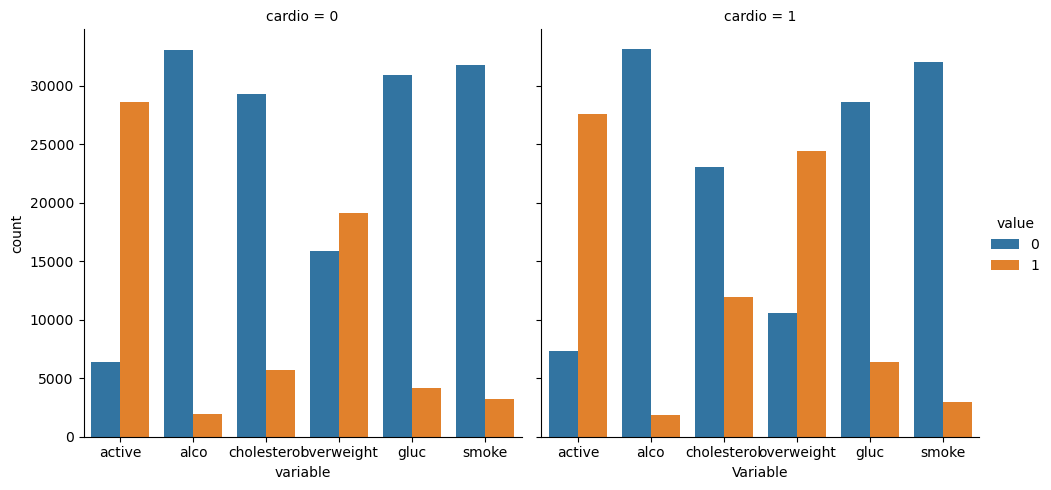

In [76]:
# Get the figure for the output

fig = plt.figure(figsize=[10,6])
fig=sns.catplot(df_cat, x="variable",col="cardio",hue="value", kind="count")
plt.ylabel("Total")
plt.xlabel("Variable")
# Do not modify the next two lines
fig.savefig('catplot.png')

In [ ]:
plt.figure(figsize=[7,7])
sns.heatmap(df[["happiness", "Log_GDP_per_capita", "Social_support","life_expectancy",
                                                "Freedom_to_make_life_choices","Generosity","Perceptions_of_corruption",
                                                "Positive_affect","Negative_affect"]].corr(method="spearman"), annot=True,cmap="Spectral",fmt='.1f',
           cbar=False,center=0)
plt.xticks(rotation=45, ha="right");